Привет! меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на красные комментарии ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ..
</div>
<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за  качественную работу, было интересно ее проверять.
- Я оставил некоторые советы надеюсь они будут полезными или интересными.
- Есть небольшие недочеты, но думаю у тебя не составить труда их исправить
- Жду обновленную работу!

# Проект "Выбор локации для скважины"

## Введение

Вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину. 
Шаги для выбора локации обычно такие:
 - В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
 - Строят модель для предсказания объёма запасов в новых скважинах;
 - Выбирают скважины с самыми высокими оценками значений;
 - Определяют регион с максимальной суммарной прибылью отобранных скважин.
 
Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

## Загрузка данных

In [1]:
!pip install -q phik

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, precision_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from phik import phik_matrix
from phik.report import plot_correlation_matrix
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.svm import SVC, SVR

matplotlib_axes_logger.setLevel('ERROR')
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('max_colwidth', -1)

BUDGET_FOR_REGION = 10000000000 
NUMBER_OF_PROF_POINTS = 200
INCOME_FROM_POINT = 450000
RANDOM_STATE = 42
TEST_SIZE = 0.25

sns.set()

<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты  на месте. Лайк за константы в верхнем регистре, не забываешь про PEP8
</div>



<div class="alert alert-block alert-info">
    
<b>Совет:</b> большие значение можно записывать так: `450_000`.

In [3]:
df_geo_data_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
display(df_geo_data_0.head(5))
df_geo_data_0.info()

df_geo_data_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
display(df_geo_data_1.head(5))
df_geo_data_1.info()

df_geo_data_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')
display(df_geo_data_2.head(5))
df_geo_data_2.info()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Данные в датасетах df_geo_data_0, df_geo_data_1 df_geo_data_2 соответствуют своему описанию, типы колонок соответствующие (возможно надо изменить тип object на тип string для параметра id). Размерность каждого датасета = 10000 х 5.
Пропусков в данных нет.

## Предобработка данных

In [4]:
def print_df_stats(df_map):
    for df_name, df in df_map.items():
        print(f'*** Dataframe {df_name}')
        print(f'Number of duplicates by id: {df.duplicated(subset="id").sum()}')
        print(f'Number of duplicates without id: {df.duplicated(subset=df.columns.difference(["id"])).sum()}')
        display(df[df.columns.difference(["id"])].describe())
        print()

df_map = {"df_geo_data_0":df_geo_data_0, "df_geo_data_1" : df_geo_data_1, "df_geo_data_2" : df_geo_data_2}
print_df_stats(df_map)

*** Dataframe df_geo_data_0
Number of duplicates by id: 10
Number of duplicates without id: 0


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347



*** Dataframe df_geo_data_1
Number of duplicates by id: 4
Number of duplicates without id: 0


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408



*** Dataframe df_geo_data_2
Number of duplicates by id: 4
Number of duplicates without id: 0


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


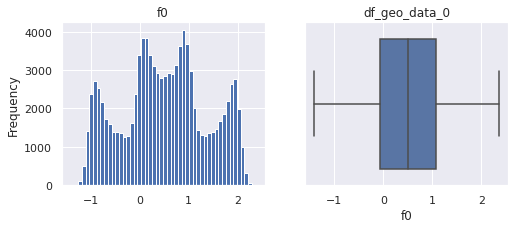

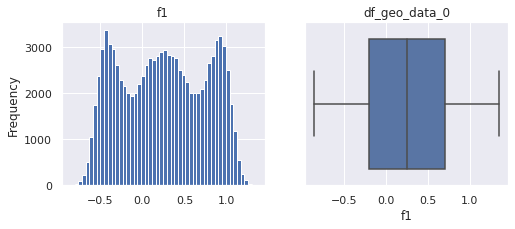

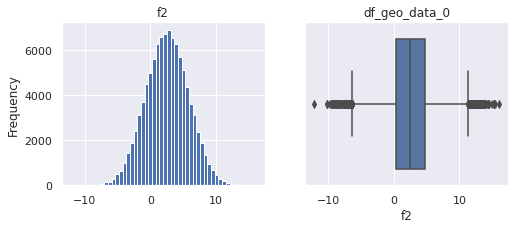

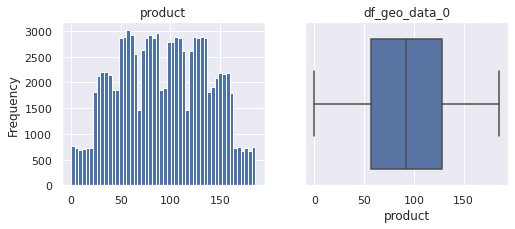

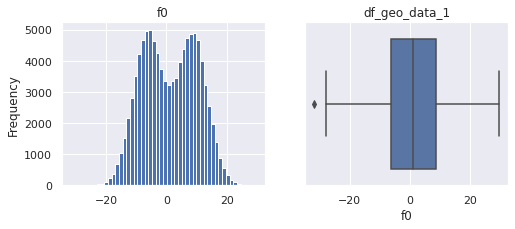

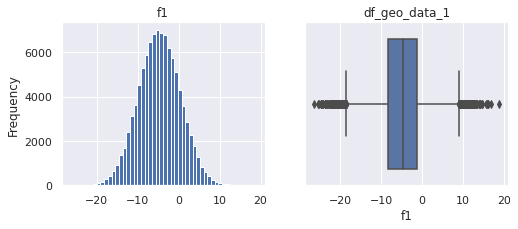

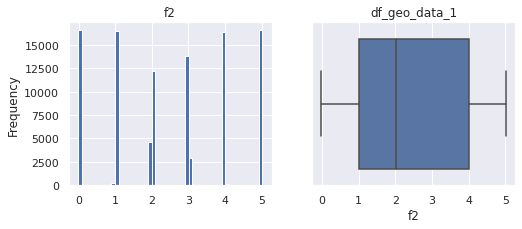

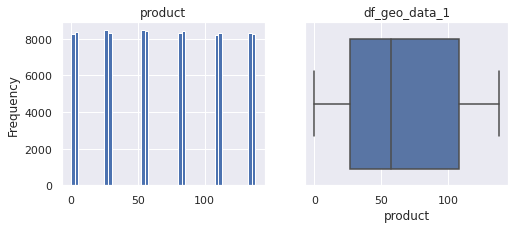

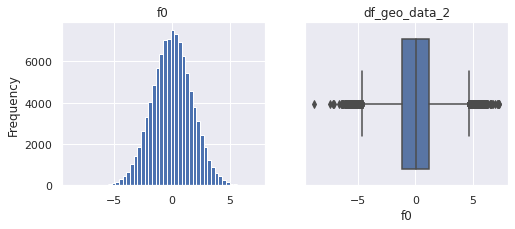

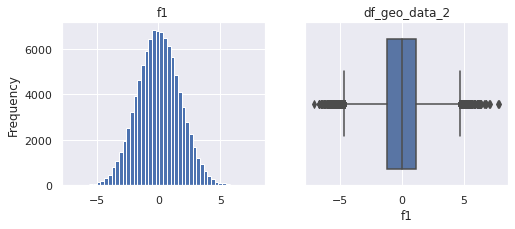

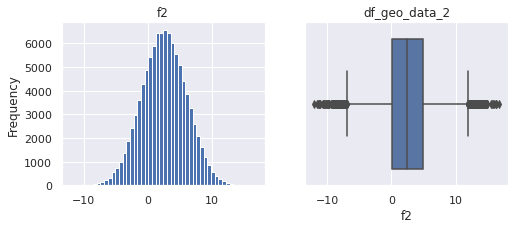

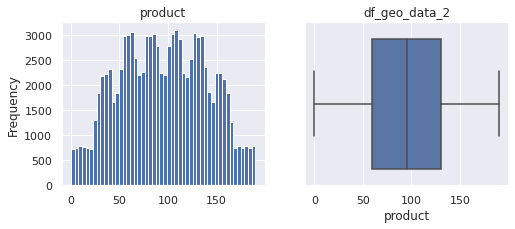

In [5]:
def plot_sub_plot_hist_boxplot(df_map):
    for df_name, df in df_map.items():
        for col in df.columns:
            if col == 'id':
                continue
            fig, axes = plt.subplots(nrows=1, ncols=2)
            df[col].plot(kind="hist", title=col, figsize=(8, 3), ax = axes[0], bins = 50)
            sns.boxplot(df[col], ax = axes[1])
            plt.title(df_name)
            plt.show()

plot_sub_plot_hist_boxplot(df_map)

На гистограммах более менее симметричная картина (mean ~ median), boxplots не показали больших выбросов для всех трех датафреймов. Оценка дубликатов по полю id показала что присутствует некоторое количество дубликатов по этому полю. Так как это уникальный индекс скважины то в этом поле дубликатов быть не должно и так как количество дубликатов (10, 4, 4) существенно меньше, чем общее число строк, то принято решение удалить эти дубликаты. По списку полей за исключением id дубликаты не обнаружены - если бы они были - пришлось бы либо удалять их либо реплейсить например медианой чтобы убрать коллинеарность.

In [6]:
df_geo_data_0 = df_geo_data_0.drop_duplicates(subset=['id'])
df_geo_data_0.info()
df_geo_data_1 = df_geo_data_1.drop_duplicates(subset=['id'])
df_geo_data_1.info()
df_geo_data_2 = df_geo_data_2.drop_duplicates(subset=['id'])
df_geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99990 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99990 non-null  object 
 1   f0       99990 non-null  float64
 2   f1       99990 non-null  float64
 3   f2       99990 non-null  float64
 4   product  99990 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99996 non-null  object 
 1   f0       99996 non-null  float64
 2   f1       99996 non-null  float64
 3   f2       99996 non-null  float64
 4   product  99996 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
--

Дубликаты по полю id удалены во всех трех датафреймах

## Исследовательский анализ данных

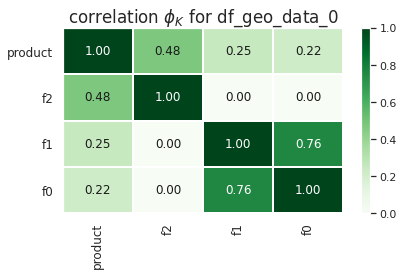

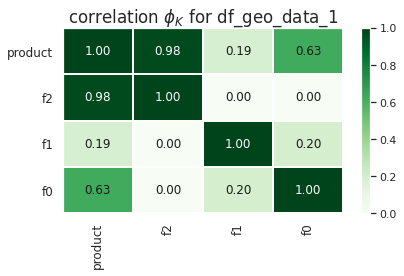

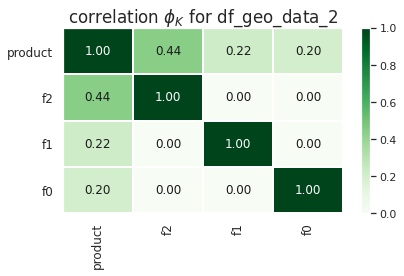

In [7]:
def show_phik_tuple_list(df_map):
    for df_name, df in df_map.items():
        phik_overview = phik_matrix(df[df.columns.difference(['id'])], interval_cols=list(df.columns.difference(['id'])))
        plot_correlation_matrix(
            phik_overview.values,
            x_labels=phik_overview.columns,
            y_labels=phik_overview.index,
            vmin=0, vmax=1, color_map='Greens',
            title=r'correlation $\phi_K$ for ' + df_name,
            fontsize_factor=1.2,
            figsize=(6, 4)
        )

show_phik_tuple_list(df_map)

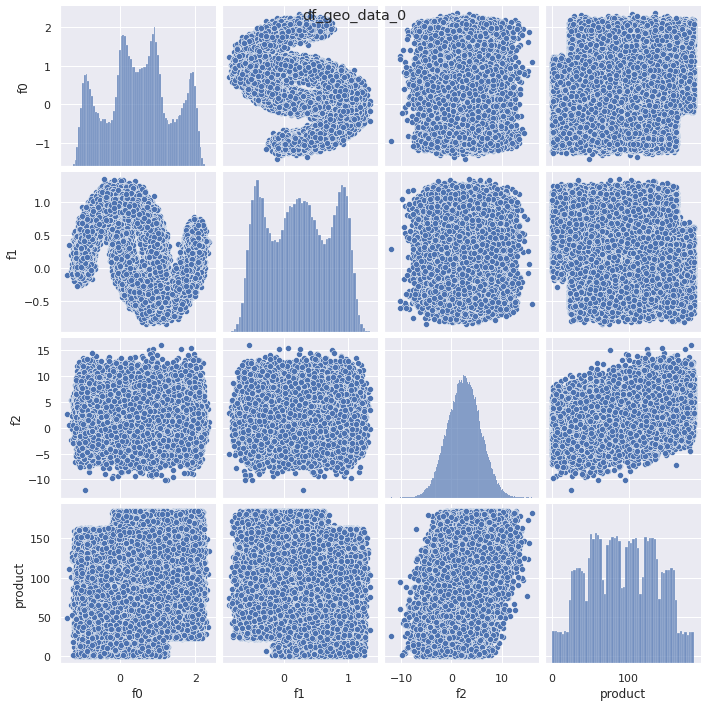

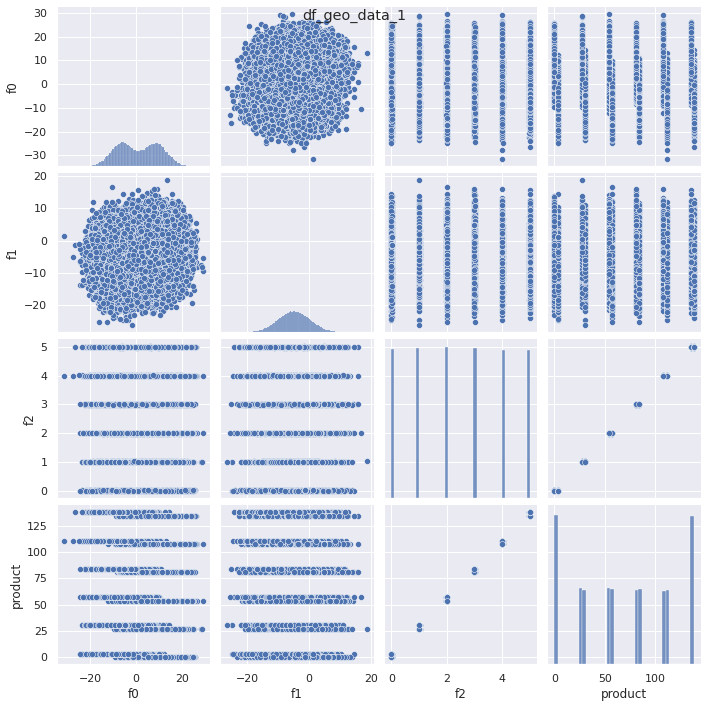

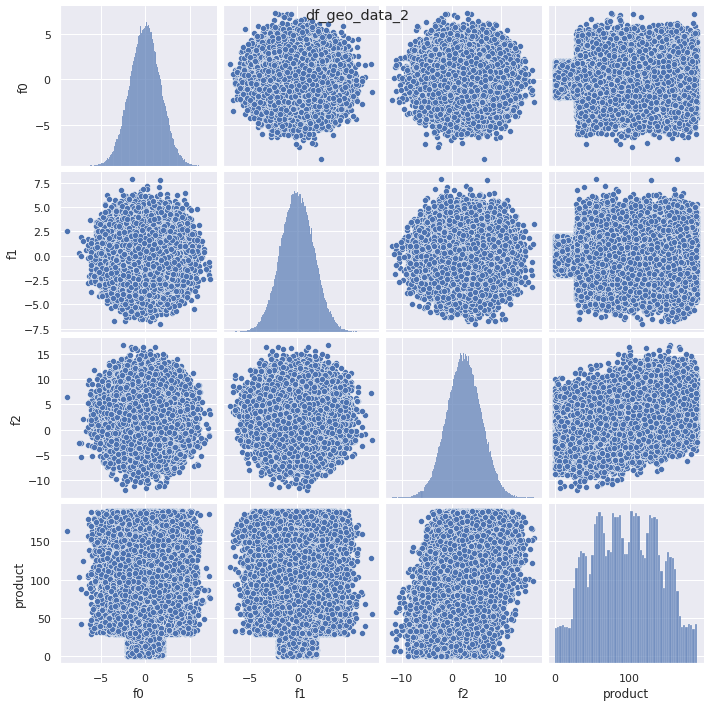

In [8]:
def show_pp_tuple_list(df_map):
    for df_name, df in df_map.items():
        g = sns.pairplot(df[df.columns.difference(['id'])], height=2.5)
        g.fig.suptitle(df_name)
        plt.show()

show_pp_tuple_list(df_map)

Анализ фик матрицы и парных scatter-графиков для трех датасетов показал, что:
- для региона 0 есть достаточно сильная корреляция между f0 и f1
- для региона 1 есть очень сильная корреляция между f2 и product и средняя корреляция между f0 и product
- scatter plots показали что для региона 1 есть строгая линейная зависимость между f2 и product, по остальным признакам сильной линейной зависимости не наблюдается

Я не вижу необходимости ни удалять входные параметры ни их модифицировать (например возведением в степень) так как природа этих данных мне неизвестна и я предлагаю их использовать as is. 


<div class="alert alert-block alert-success">
<b>Успех:</b> Данные осмотрены и обработаны хорошо, особенно радует, что изучены корреляции, так как мы планируем использовать линейные модели, а для них это важно. 
</div>


## Обучение модели для каждого региона

### Подготовка данных, обучение модели и предсказание на валидационной выборке

In [9]:
raw_map = {}

def calc_models_tuple_list(df_map):
    for df_name, df in df_map.items():
        X_train, X_val, y_train, y_val = train_test_split(
            df.drop(['product','id'], axis=1),
            df['product'],
            test_size = TEST_SIZE, 
            random_state = RANDOM_STATE)
        scaler = StandardScaler().fit(X_train)
        X_train_transformed = scaler.transform(X_train)
        clf = LinearRegression().fit(X_train_transformed, y_train)
        X_val_transformed = scaler.transform(X_val)
        y_predicted = clf.predict(X_val_transformed)
        raw_map[df_name] = (y_val, y_predicted)
        rms = mean_squared_error(y_val, y_predicted, squared=False)
        print(f'Модель ЛинРег для датафрейма {df_name} показала, что средний запас сырья = {y_predicted.mean()} тыс баррелей и метрика rmse = {rms}')

calc_models_tuple_list(df_map)
print(raw_map.keys())

Модель ЛинРег для датафрейма df_geo_data_0 показала, что средний запас сырья = 92.39879990657768 тыс баррелей и метрика rmse = 37.75660035026169
Модель ЛинРег для датафрейма df_geo_data_1 показала, что средний запас сырья = 68.7128780391376 тыс баррелей и метрика rmse = 0.8902801001028846
Модель ЛинРег для датафрейма df_geo_data_2 показала, что средний запас сырья = 94.77102387765939 тыс баррелей и метрика rmse = 40.145872311342174
dict_keys(['df_geo_data_0', 'df_geo_data_1', 'df_geo_data_2'])


### Анализ результатов

Минимальное значение метрики RMSE = 0.8902801001028845 показала модель ЛинРег на датафрейме df_geo_data_1 со средним значением запаса сырья = 68.7128780391376 тыс баррелей - то есть для этого региона модель предсказывает лучше всего.

Предсказания и правильные ответы на валидационной выборке для каждого датафрейма сохранены в словаре dict_keys в виде пар Имя датафрейма -> Кортеж (Истинное, Предсказанное)


<div class="alert alert-block alert-success">
<b>Успех:</b> Шаг проделан лаконично, все метрики посчитаны корректно. Радует, что scaler был обучен только на трейне
</div> 

## Рассчет прибыли

In [10]:
raw_material_value = BUDGET_FOR_REGION / NUMBER_OF_PROF_POINTS / INCOME_FROM_POINT
print(f'Достаточный объём сырья для безубыточной разработки новой скважины = {raw_material_value} тыс баррелей')


Достаточный объём сырья для безубыточной разработки новой скважины = 111.11111111111111 тыс баррелей


### Выводы

Достаточный объём сырья для безубыточной разработки новой скважины = 111.11111111111111 тыс баррелей. Значение было получено исходя из следующих вводных данных:
- Бюджет на разработку скважин в регионе — 10 млрд рублей
- Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей
- Отбираются в итоге 200 лучших скважин

Это значение выше чем средние значения объема сырья для скважин по всем трем регионам, полученным выше, что можно объяснить тем, что эти средние значения считались по всем значениям в датафрейме (~100000) без отбора 200 максимальных и это утягивало среднее значение вниз.

<div class="alert alert-block alert-success">
<b>Успех:</b> Значение для безубыточной разработки посчитано верно, с выводом согласен  
</div>

## Разработка функции для расчёта прибыли по выбранным скважинам и предсказаниям модели

In [11]:
def revenue(target):
    target_sorted = target.sort_values(ascending=False)
    target_sorted = target_sorted[:NUMBER_OF_PROF_POINTS]
    return INCOME_FROM_POINT * target_sorted.sum()


<div class="alert alert-block alert-danger">
<b>Ошибка:</b>

`Прибыль = доходы - расходы` - а у тебя здесь только доходы.

</div>


## Рассчет рисков и прибыли для каждого региона

### Применение техники Bootstrap с 1000 выборок, чтобы найти распределение прибыли

In [12]:
state = np.random.RandomState(12345)
    
revenue_map = {}
for df_name, y_tuple in raw_map.items():
    for i in range(1000):
        target_subsample = pd.Series(y_tuple[1]).sample(n = 500, replace=True, random_state=state)
        if df_name not in revenue_map.keys():
            revenue_map[df_name] = []
        revenue_map[df_name].append(revenue(target_subsample))

print(revenue_map.keys())

dict_keys(['df_geo_data_0', 'df_geo_data_1', 'df_geo_data_2'])


<div class="alert alert-block alert-success">
<b>Успех:</b> С бутстрапом тоже все в порядке (сэмплирование происходит с возвращением)
</div>




<div class="alert alert-block alert-info">
<b>Совет: </b> Если интересно изучить тему бутстрапа глубже - я оставлю  ниже несколько интересных и полезных ссылок по теме:
        
1. "Bootstrap Hypothesis Testing in Statistics with Example" 
        
https://www.youtube.com/watch?v=9STZ7MxkNVg
        
2. "How to Calculate Bootstrap Confidence Intervals For Machine Learning Results in Python" 
        
https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/
        
3. "A Gentle Introduction to the Bootstrap Method" 

https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/
        
4. "An Introduction to the Bootstrap Method" 
        
https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60#:~:text=The%20basic%20idea%20of%20bootstrap,population%20mean)%20on%20sample%20data.&amp;text=A%20sample%20from%20population%20with%20sample%20size%20n
        
5. "Bootstrapping and Resampling in Statistics with Example" 
        
        
https://www.youtube.com/watch?v=O_Fj4q8lgmc

6. Также одна из программ на рынке по этой теме управлненеческого моделирования - AnyLogic - интересный продукт. Можешь видео из интернета посмотреть по какому-нибудь примеру с её использованием. Тогда тема управленческого моделирования и бутстрапа может по-другому лечь.
</div>



### Определение средней прибыли, 95%-й доверительного интервала и риска убытков

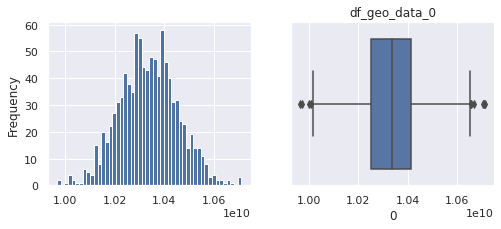

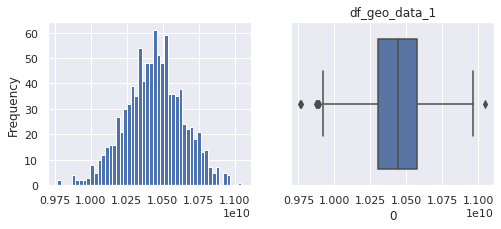

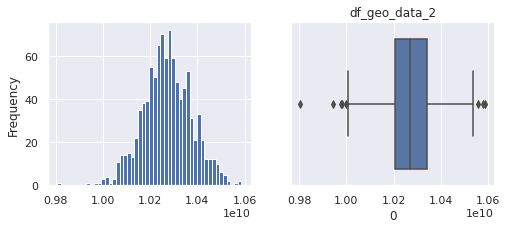

Для региона df_geo_data_0 средняя прибыль = 10334734366.583149 рублей
       95% доверительный интервал[10115438415.229212 : 10562189709.304935]
       риск убытков = 0.3%

Для региона df_geo_data_1 средняя прибыль = 10439307236.380054 рублей
       95% доверительный интервал[10031369710.548811 : 10833072656.14227]
       риск убытков = 1.6%

Для региона df_geo_data_2 средняя прибыль = 10271958729.400133 рублей
       95% доверительный интервал[10069246112.533928 : 10477518809.109726]
       риск убытков = 0.4%



In [13]:
revenue_map_series = {}
for df_name, target_list in revenue_map.items():
    revenue_map_series[df_name] = pd.DataFrame(target_list)

plot_sub_plot_hist_boxplot(revenue_map_series)

def inverse_quantile(df, treshold):
    return df[df[0] < treshold][0].count() / df[0].count()

for df_name, df in revenue_map_series.items():
    print(f'Для региона {df_name} средняя прибыль = {df[0].mean()} рублей')
    lower = df[0].quantile(0.025)
    higher = df[0].quantile(0.975)
    print(f'       95% доверительный интервал[{lower} : {higher}]')
    print(f'       риск убытков = {inverse_quantile(df, BUDGET_FOR_REGION) * 100}%')
    print()



<div class="alert alert-block alert-success">
<b>Успех:</b> Все метрики считаются верным образом!  
</div>


### Выводы по определению самого прибыльного региона

Условия отбора самого прибыльного региона:
- сначала отобрать регионы, у которых риск убытков меньше 2.5%
- потом из них выбрать регион с наибольшей средней прибылью

По первому условию проходят все три региона

По второму условию отбираем регион df_geo_data_1

## Общие выводы

- Данные по всем трем регионам были чистые, аномалий и пропусков не было обнаружено.
- Корреляционные матрицы показали определенные корреляции как между входными параметрами и таргетом так и только между входными параметрами. Но в связи с тем, что данные были синтетические и ничего нельзя было сказать о природе самих данных, то никаких манипуляция с входными параметрами не проводилось и они использовались as is.
- По исходным данным по всем трем регионам были построены модели ЛинРег (с пердварительным скейлингом StandardScaler) и самые лучшие показатели по метрике RMSE показал регион df_geo_data_1, данные по двум другим регионам показали значительно больший разброс.
- Был расcчитан Достаточный объём сырья для безубыточной разработки новой скважины = 111.11111111111111 тыс баррелей. Это значение (которое считалось из рассчета на 200 скважин) выше чем средние значения объема сырья для скважин по всем трем регионам [92.39879990657768  68.7128780391376 94.77102387765939], что можно объяснить тем, что эти средние значения считались по всем значениям в датафрейме (~100000) без отбора 200 максимальных и это утягивало среднее значение вниз.
- Была разработана функция для рассчёта прибыли по выбранным скважинам и предсказаниям модели.
- С помощью этой функции была применена техника Bootstrap с 1000 выборок, 500 отобранных точек в каждой выборке и 200 отобранных в результате точек с максимальной прибылью - чтобы найти распределение прибыли для этих 200 точек.
- Полученные распределения для каждого региона были проанализированы, для них были посчитаны средняя прибыль, 95% доверительный интервал и риск убытков и на основании критериев отбора самого прибыльного региона, указанных в ТЗ, был выбран регион df_geo_data_1 как самый прибыльный. Для этого же региона ЛинРег модель показала самую лучшую метрику.





<div class="alert alert-block alert-info">
<b>Совет: </b>
    
Не забудь обновить выводы, если потребуется
</div>       